In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import cycle
from scipy import stats
from pathlib import Path
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [67]:
# ------------------------------- setting start ------------------------------ #
# color
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
errorbar_color = "#3A3A3A"

# font
csfont = {'family':'Times New Roman', 'serif': 'Times' , 'size' : 23}
plt.rc('text', usetex=True)
plt.rc('font', **csfont)

# bar plot size
bar_width = 0.4
bar_btw_space = 0.04
bar_space = 0.2

# errorbar plot size
err_lw=1.5
err_capsize=4
err_capthick=1.5

# set fig size
figsize=(6.4, 4.8)
# -------------------------------- setting end ------------------------------- #

In [68]:
def linePlotMain():
    # ---------------------------- Step 0: preprocess ---------------------------- #
    # set where should the fig save
    saveDir = Path(".")/"figs"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    # set where is the data
    filePath = Path(".")/"data.csv"
    
    # read data as pandas.DataFrames
    df = pd.read_csv(filePath)

    # --------------------- Step 1: change to plotting format -------------------- #
    df_plot = df
    
    # # replace the value
    # df_plot['algorithm'] = df_plot['algorithm'].replace(['Disturber'], 'DO')
    
    # # filter
    # df_plot = df_plot[(df_plot['algorithm'] == "Disturber") & (df_plot['noise'] == 0)]

    # ------------------------------- Step 2: plot ------------------------------- #
    hue_order = ["City","Gallery", "Nature", "Office"]
    
    # Main plot code
    ax = sns.lineplot(x='epsilon', y='psnr_mean', 
                      hue="scene", hue_order=hue_order, 
                      style="scene", # line style https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
                      lw=4,
                      data=df_plot, 
                      markers=[".","*","^","D"], # point marker https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
                      markersize=17,
                      errorbar=('ci', 95), err_style="bars", # if no error bar skip this line and change to "ci=None"
                      palette = 'deep' # usually use "tab10" https://www.practicalpythonfordatascience.com/ap_seaborn_palette. You can also use a list of hex color code
                      )
    
    # Settings
    ax.set(xlabel=r'$\epsilon$', ylabel='PSNR (dB)') # use r'$xxx$' for latex format
    ax.set(xlim = (-10,210), ylim = (12, 35))
    ax.set_xticks([0, 50, 100, 150, 200])
    ax.set_yticks([20, 30])
    # plt.xticks(rotation = 45) # if you want to rotate the xticks
    # plt.yticks(rotation = 45) # if you want to rotate the yticks

    # Set legend only if you are using hue https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
    labels = ["City","Gallery", "Nature", "Office"]
    plt.legend(title='', loc='lower right', labels=labels, ncol=2)
    # plt.legend(title='', loc='lower right', labels=labels, bbox_to_anchor=(0.68, 1), ncol=1) # if you are moving the legend loc more precisely
    
    # Save figure
    plt.savefig(f'{saveDir}/scene_all_psnr.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/scene_all_psnr.eps', dpi=300, bbox_inches='tight')
    plt.show()


In [69]:
def barPlotMain():
    # ---------------------------- Step 0: preprocess ---------------------------- #
    # set where should the fig save
    saveDir = Path(".")/"figs"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    # set where is the data
    filePath = Path(".")/"data.csv"
    
    # read data as pandas.DataFrames
    df = pd.read_csv(filePath)

    # --------------------- Step 1: change to plotting format -------------------- #
    df_plot = df
    
    # # replace the value
    # df_plot['algorithm'] = df_plot['algorithm'].replace(['Disturber'], 'DO')
    
    # # filter
    # df_plot = df_plot[(df_plot['algorithm'] == "Disturber") & (df_plot['noise'] == 0)]
    
    # ------------------------------- Step 2: plot ------------------------------- #
    hue_order = ["City","Gallery", "Nature", "Office"]
    
    # Main plot code
    ax = sns.barplot(x='userIdx', y='ssim_mean', 
                      hue="scene", hue_order=hue_order, 
                      data=df_plot, 
                      errorbar=('ci', 95),
                      palette = 'tab10'
                    )
    
    # Set the pattern on bar, which is called "hatch"
    hatches = cycle(['///', '\\', 'x', '-']) # https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html
    num_locations = len(df_plot["userIdx"].unique())
    for i, patch in enumerate(ax.patches):
        if i % num_locations == 0:
            hatch = next(hatches)
        patch.set_hatch(hatch)
    
    # Settings
    ax.set(xlabel=r'$\epsilon$', ylabel='ssim') # use r'$xxx$' for latex format
    ax.set(ylim = (0.2, 1.0))
    ax.set_yticks([0.3, 0.5, 0.7, 0.9])
    # plt.xticks(rotation = 45) # if you want to rotate the xticks
    # plt.yticks(rotation = 45) # if you want to rotate the yticks

    # Set legend only if you are using hue https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
    plt.legend(title='', loc='lower right', ncol=1)
    # plt.legend(title='', loc='lower right', bbox_to_anchor=(0.68, 1), ncol=1) # if you are moving the legend loc more precisely
    
    # Save figure
    plt.savefig(f'{saveDir}/scene_all_psnr.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/scene_all_psnr.eps', dpi=300, bbox_inches='tight')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


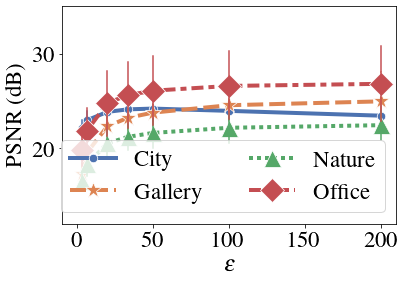

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


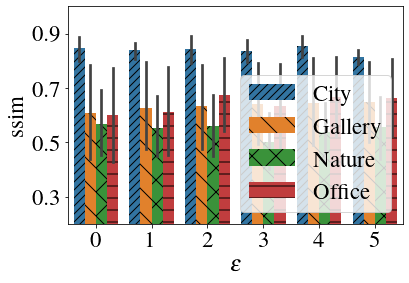

In [70]:
linePlotMain()
barPlotMain()